In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
#the requests module may need to be imported into your python
#other options include urllib or urllib3 but requests is the python preferred due to it's many features

In [2]:
#requests let us to requests.get or reqeusts.post and can accept a second dict parm of key-value pairs
#we get back a response OBJECT
response = requests.get("http://www.pythonscraping.com/pages/page3.html")

#the text is available as resonse.content
soup = BeautifulSoup(response.content, "html.parser")

#select the table we are looking for - it includes all the children we want
tableNode = soup.find('table', {'id':'giftList'})

#uncomment the next line to take a look at what we need to navigate over
#print(tableNode.prettify())

#tableNode.children is a list_iterator - let's look at how may children?
childList = list(tableNode.children)
print (len(childList) )  



13


In [3]:
# note that the list length = 13 why 13?
# the answer is that we have white space (\s) and \n between the tags which technically are children of the table node

# Strategy: let's use a python list comprehension with a filter to eliminate everything that is not a bs4.element.Tag
childList  = [x for x in childList if type(x)  == bs4.element.Tag]
print (len(childList))

6


In [4]:
#now we know we are only dealing with real nodes that can have children and these should be <td> elements
import re
itemList = []
priceList = []
for child in childList:
    tdlist = child.find_all('td')
    
    #to be safe, let's make sure we have <td> column nodes
    if (len(tdlist) > 0):
        #we are interested in the first [0] and third [2] columns for description and price
        #when we looked at the text we found '\n' and the prices have '$' and commas which we don't want
        #Let's use strip('\n') and with regex power, can use re.sub with a character class to finish the job
        item = tdlist[0].getText().strip('\n')
        price = tdlist[2].getText().strip('\n')
        # $10,000.50 -> 10000.50
        price = re.sub('[,$]','',price)
        itemList.append(item)
        priceList.append(price)
        
print (itemList)
print (priceList)        
        
        

['Vegetable Basket', 'Russian Nesting Dolls', 'Fish Painting', 'Dead Parrot', 'Mystery Box']
['15.00', '10000.52', '10005.00', '0.50', '1.50']


In [5]:
# now let's convert the string to floats for our plots - let's use a list coomprehension
priceListNum = [float(x) for x in priceList]
print (priceListNum)

#also our labels are long and overlap in the plot so let's just use the last word in the string
#again, a list comprehension comes in handy - let's split to give us a list and then grab  LAST word in the string
itemList = [str.split()[-1] for str in itemList]
print (itemList)

[15.0, 10000.52, 10005.0, 0.5, 1.5]
['Basket', 'Dolls', 'Painting', 'Parrot', 'Box']


In [6]:
#We are good to go to plot land
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = itemList
yval  = priceListNum

#for pyplot: create a list of integers based on the size of our itemList
x_pos = [i for i, _ in enumerate(x)]

#have a look
print (x_pos)

[0, 1, 2, 3, 4]


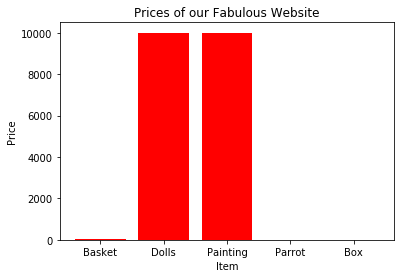

In [7]:
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
plt.xlabel("Item")
plt.ylabel("Price")
plt.title("Prices of our Fabulous Website")
plt.show()

### To export this notebook as a python file or html or reveal.js slides or pdf using the File menu
<code> File > Download as > PDF  </code>

#### Or : if we are outside of jupyter we can create a python file using:
<code>jupyter nbconvert --to script myfile.ipynb</code>

